In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('BusinessMasterFile.csv')
df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME,RULEYEAR,LEVEL4,ACT1,ACT2,ACT3
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,NaN,NaN,NaN,NaN,3514,1955,NaN,100,0.0,0.0
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,NaN,NaN,NaN,NaN,NaN,1972,NaN,100,0.0,0.0
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,NaN,NaN,NaN,X21,NaN,2004,X,0,NaN,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,NaN,NaN,NaN,X21,NaN,2004,X,0,NaN,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,NaN,NaN,NaN,X20,NaN,2004,X,0,NaN,NaN


In [2]:
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('ggplot')

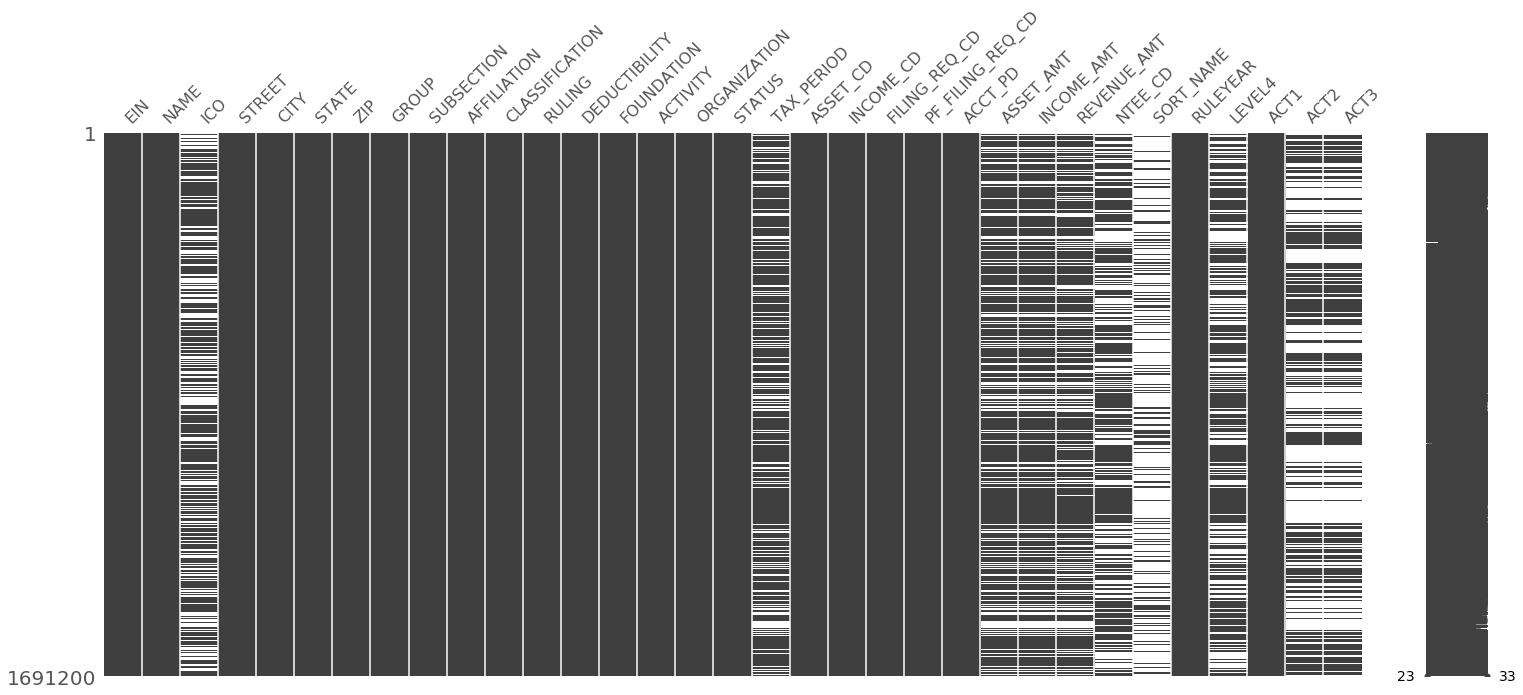

In [3]:
msno.matrix(df)

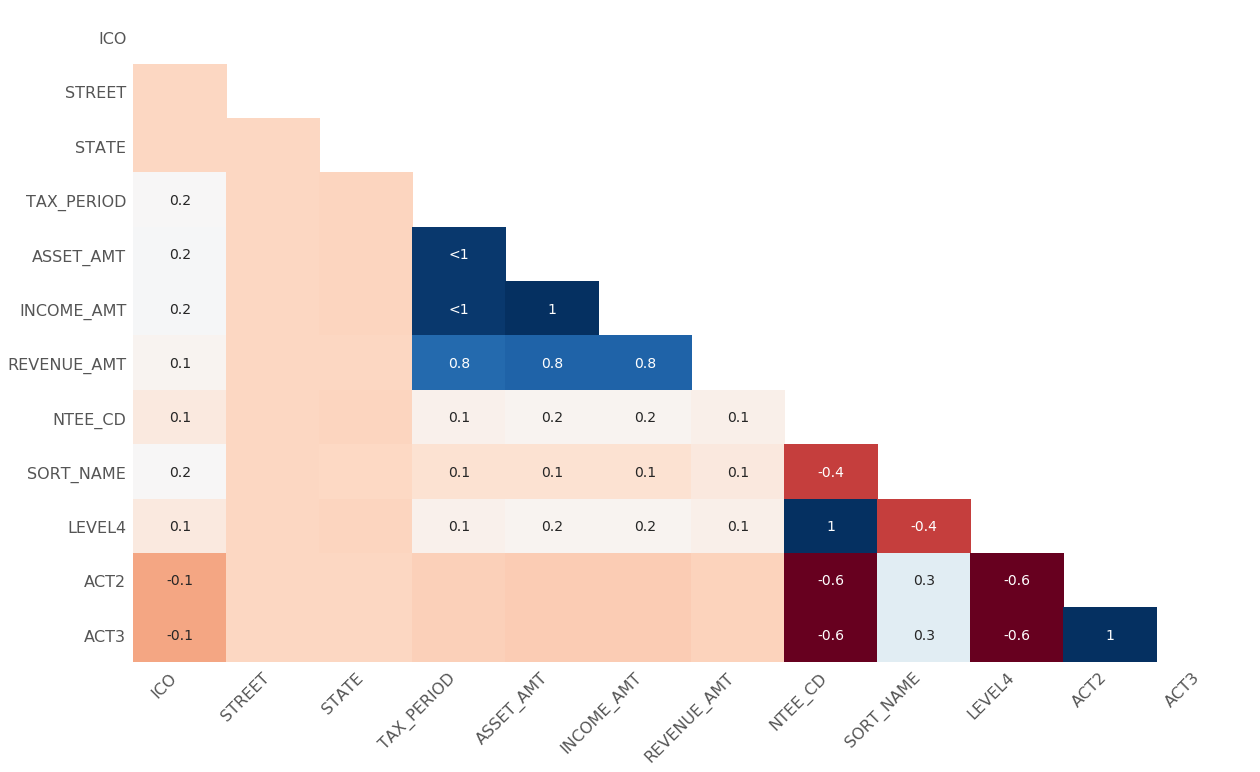

In [4]:
msno.heatmap(df)

In [5]:
df.isna().sum()

EIN                       0
NAME                      0
ICO                  589563
STREET                    2
CITY                      0
STATE                  1267
ZIP                       0
GROUP                     0
SUBSECTION                0
AFFILIATION               0
CLASSIFICATION            0
RULING                    0
DEDUCTIBILITY             0
FOUNDATION                0
ACTIVITY                  0
ORGANIZATION              0
STATUS                    0
TAX_PERIOD           351197
ASSET_CD                  0
INCOME_CD                 0
FILING_REQ_CD             0
PF_FILING_REQ_CD          0
ACCT_PD                   0
ASSET_AMT            368826
INCOME_AMT           368826
REVENUE_AMT          479112
NTEE_CD              645285
SORT_NAME           1254791
RULEYEAR                  0
LEVEL4               645285
ACT1                      0
ACT2                 898743
ACT3                 898743
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691200 entries, 0 to 1691199
Data columns (total 33 columns):
EIN                 int64
NAME                object
ICO                 object
STREET              object
CITY                object
STATE               object
ZIP                 object
GROUP               int64
SUBSECTION          int64
AFFILIATION         int64
CLASSIFICATION      int64
RULING              int64
DEDUCTIBILITY       int64
FOUNDATION          int64
ACTIVITY            int64
ORGANIZATION        int64
STATUS              int64
TAX_PERIOD          float64
ASSET_CD            int64
INCOME_CD           int64
FILING_REQ_CD       int64
PF_FILING_REQ_CD    int64
ACCT_PD             int64
ASSET_AMT           float64
INCOME_AMT          float64
REVENUE_AMT         float64
NTEE_CD             object
SORT_NAME           object
RULEYEAR            int64
LEVEL4              object
ACT1                int64
ACT2                float64
ACT3                float64
dtypes: 

In [7]:
print(df.REVENUE_AMT.value_counts()[:5])
df.REVENUE_AMT.isna().value_counts()

0.0        688791
1000.0        296
500.0         221
5000.0        215
100.0         214
1.0           204
10000.0       185
2000.0        163
3000.0        133
200.0         129
1500.0        122
2500.0        116
2.0           105
6000.0        103
300.0          99
5.0            98
Name: REVENUE_AMT, dtype: int64


False    1212088
True      479112
Name: REVENUE_AMT, dtype: int64

In [8]:
print(df.ASSET_AMT.value_counts()[:5])
print(df.ASSET_AMT.isna().sum())
print(df.ASSET_CD.value_counts()[:5])
print(df.ASSET_CD.isna().sum())

0.0        677902
1.0         15623
100.0         285
1000.0        217
500.0         191
200.0         120
2000.0        108
5000.0        103
10.0          101
50.0           90
300.0          83
1500.0         81
150.0          73
10000.0        69
25.0           69
5.0            67
Name: ASSET_AMT, dtype: int64
368826
0    1032113
4     169004
3     123873
6     101784
1      80491
Name: ASSET_CD, dtype: int64
0


I am trying to decide whether or not to drop ASSEST_CD/ASSET_AMT and INCOME_AMT/INCOME_CD.

ASSET_AMT is continious data, rather than the coded data in ASSET_CD, so I will keep the AMTs reported over the prebinned. I can alter it myself if need be. Also there seems to be some discrepancy in values from the coded and the reported, which makes my decision. 

Tasks:
- Combine `city`, `street`, `state` into lat and longs. Drop `city`, `street`, `state`. This is the location of the headquarters and doesn't mean that the 501c has operations in that state. [https://github.com/geopy/geopy]
- Change datetime data into correct formats. `TAX_PERIOD`, `RULING_DATE`
- Make things categorical
- Investigate any connection between SORT_NAME and GROUP EXEMPTION NUM and AFFILCATION CODE [Connection?](#task1)
- Check the Ruling year after 1995 and see if any NTEE exisits.


<a id="task1"></a>

Sort Name Line is another name under which the organization does business.  Also used for trade names, chapter names, or local numbers for subordinate organizations of group rulings

Central - This code is used if the organization is a central type organization (no group exemption) of a National, Regional or Geographic grouping of organizations. 2 Intermediate - This code is used if the organization is an intermediate organization (no group exemption) of a National, Regional or Geographic grouping of organizations (such as a state headquarters of a national organization). 3 Independent - This code is used if the organization is an independent organization or an independent auxiliary 
(i.e., not affiliated with a National, Regional, or Geographic grouping of organizations). 6 Central - This code is used if the organization is a parent (group ruling) and is not a church or 501(c)(1) organization. 7 Intermediate - This code is used if the organization is a group exemption intermediate organization of a National, Regional or Geographic grouping of organizations. 8 Central - This code is used if the organization is a parent (group ruling) and is a church or 501(c)(1) organization. 9 Subordinate - This code is used if the organization is a subordinate in a group ruling

In [9]:
df.drop(['ICO', 
         'RULING', 
         'ACT2', 
         'ACT3', 
         'ASSET_CD', 
         'INCOME_CD', 
         'LEVEL4', 
         'TAX_PERIOD'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691200 entries, 0 to 1691199
Data columns (total 25 columns):
EIN                 int64
NAME                object
STREET              object
CITY                object
STATE               object
ZIP                 object
GROUP               int64
SUBSECTION          int64
AFFILIATION         int64
CLASSIFICATION      int64
DEDUCTIBILITY       int64
FOUNDATION          int64
ACTIVITY            int64
ORGANIZATION        int64
STATUS              int64
FILING_REQ_CD       int64
PF_FILING_REQ_CD    int64
ACCT_PD             int64
ASSET_AMT           float64
INCOME_AMT          float64
REVENUE_AMT         float64
NTEE_CD             object
SORT_NAME           object
RULEYEAR            int64
ACT1                int64
dtypes: float64(3), int64(15), object(7)
memory usage: 322.6+ MB


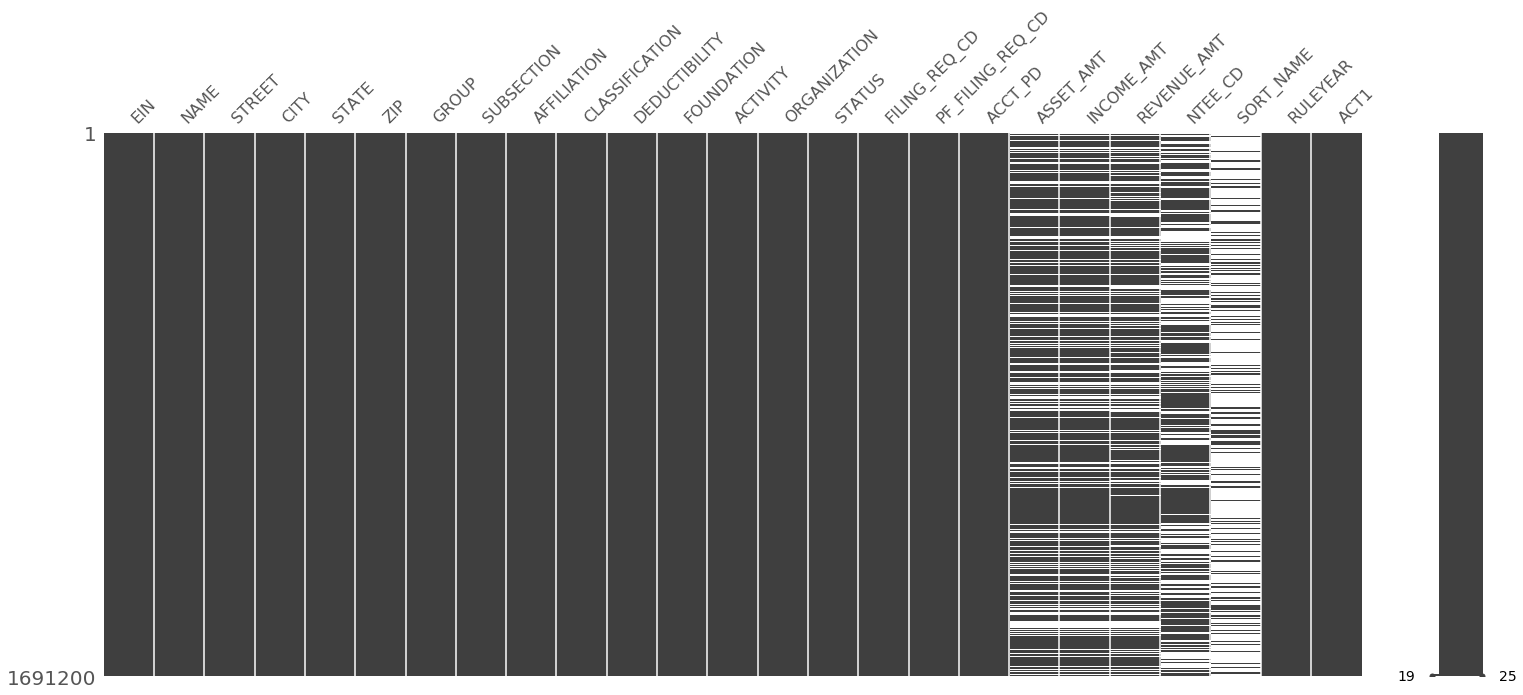

In [11]:
msno.matrix(df)

There is a clear pattern of missing values from `ASSET_AMT`,`INCOME_AMT`, and `REVENUE_AMT`. I will drop values from one column, extending down the rows and then will recheck the patterns.

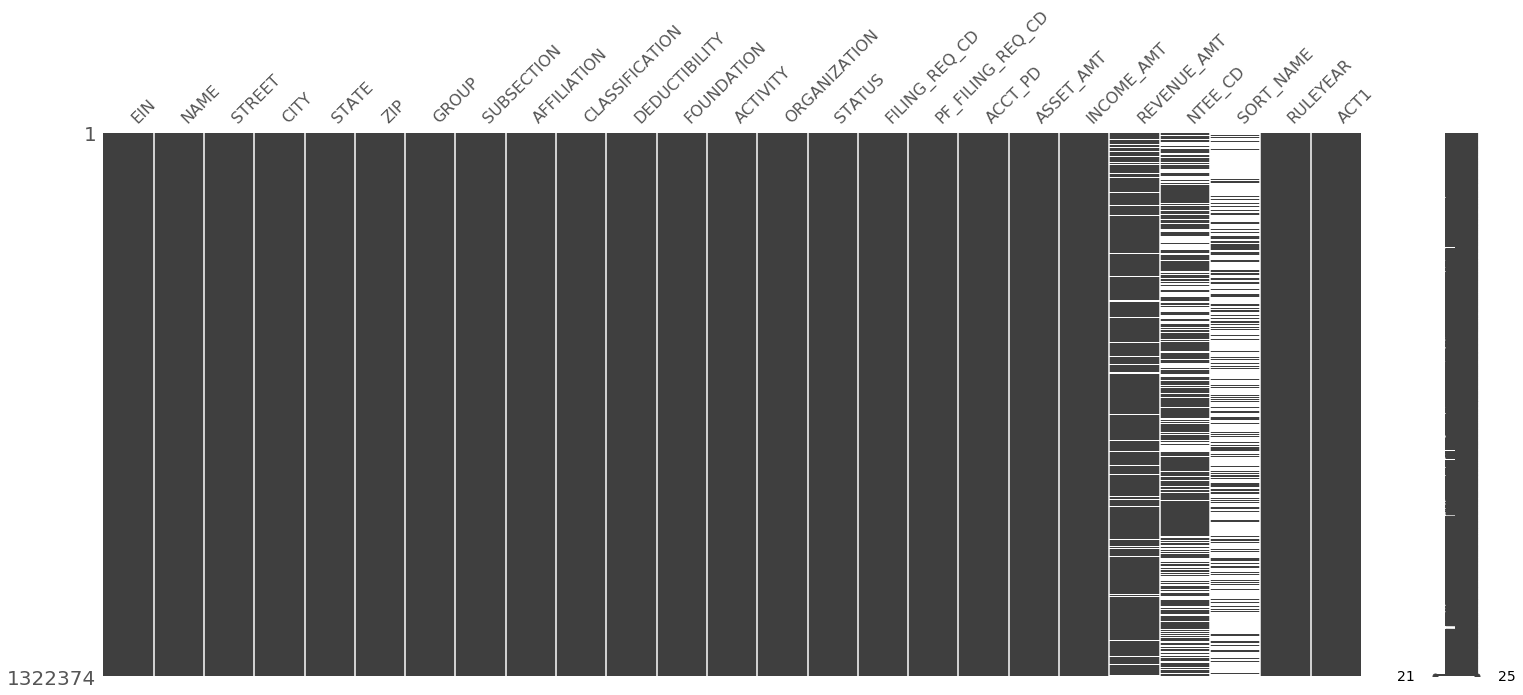

In [12]:
df = df.dropna(subset=['ASSET_AMT'])
msno.matrix(df)

~370,000 entries were removed. 

In [13]:
df.isna().sum()

EIN                      0
NAME                     0
STREET                   2
CITY                     0
STATE                 1062
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT         110286
NTEE_CD             451552
SORT_NAME           965875
RULEYEAR                 0
ACT1                     0
dtype: int64

The last 100K from `REVENUE_AMT` will be dropped as well. I will combine the `SORT_NAME` column with the `NAME` column since they both come from the same field, just a different line. `NTEE_CD` will be addressed seperately as well.

In [14]:
df = df.dropna(subset=['REVENUE_AMT'])

In [15]:
df.isna().sum()

EIN                      0
NAME                     0
STREET                   2
CITY                     0
STATE                  940
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT              0
NTEE_CD             415581
SORT_NAME           868547
RULEYEAR                 0
ACT1                     0
dtype: int64

In [16]:
df.SORT_NAME = df.SORT_NAME.fillna(value = '') #Replaces np.NaN values with something else, string + np.NaN = np.NaN
df['NAME_FULL'] = df.NAME + ' ' + df.SORT_NAME #New column
df.drop(['NAME', 'SORT_NAME'], axis=1, inplace=True) #Getting rid of the old
df.head()

,EIN,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,...,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR,ACT1,NAME_FULL
12,10002847,PO BOX 126,HULLS COVE,ME,04644-0126,0,3,3,1000,1,...,2,0,12,0.0,0.0,0.0,A80,2000,0,HULLS COVE NEIGHBORHOOD ASSOCIATION
13,10011694,30 SAMUEL PRESCOTT DR,STOW,MA,01775-1167,0,3,3,1000,1,...,2,0,12,0.0,0.0,0.0,S19,2015,995,MASSACHUSETTS MODERATORS ASSOCIATION
14,10015091,PO BOX 13,CEDAR KNOLLS,NJ,07927-0013,0,3,3,1000,1,...,1,0,12,62462.0,140685.0,140685.0,N64,2012,0,HANOVER SOCCER CLUB INC
15,10017496,PO BOX 534,YORK HARBOR,ME,03911-0534,0,3,3,2000,1,...,1,0,12,233819.0,180773.0,127013.0,NaN,1993,149,AGAMENTICUS YACHT CLUB OF YORK
16,10018555,81 COLLEGE AVE,ORONO,ME,04473-4210,287,7,9,1000,2,...,2,0,12,0.0,0.0,0.0,NaN,1941,360,ALPHA TAU OMEGA FRATERNITY BETA UPSILION MAINE...


In [17]:
df.isna().sum()

EIN                      0
STREET                   2
CITY                     0
STATE                  940
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT              0
NTEE_CD             415581
RULEYEAR                 0
ACT1                     0
NAME_FULL                0
dtype: int64

My target is going to `ACTIVITY`. The values in this are 9 charaters long, each set of three indicating what kind of the organization it is. There are some that needed more than one set of three to define their organization, others only have one. Planning to use only the first activity code. Multiple targets would not be ideal. Also I have to keep in mind, there are ones that could apply to different targets.

In [18]:
df.loc[(df.NTEE_CD.notna()) & (df.ACTIVITY == 0)].head()

,EIN,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,...,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR,ACT1,NAME_FULL
12,10002847,PO BOX 126,HULLS COVE,ME,04644-0126,0,3,3,1000,1,...,2,0,12,0.0,0.0,0.0,A80,2000,0,HULLS COVE NEIGHBORHOOD ASSOCIATION
14,10015091,PO BOX 13,CEDAR KNOLLS,NJ,07927-0013,0,3,3,1000,1,...,1,0,12,62462.0,140685.0,140685.0,N64,2012,0,HANOVER SOCCER CLUB INC
38,10028850,PO BOX 227,BERWICK,ME,03901-0227,0,13,3,2000,1,...,1,0,3,2258879.0,722972.0,277731.0,Y50,2016,0,BERWICK CEMETERY ASSOCIATION INC
70,10096117,442 SUNSET RD,DEER ISLE,ME,04627-3869,0,7,3,1000,2,...,1,0,12,454366.0,326433.0,289448.0,N50,2000,0,ISLAND COUNTRY CLUB
96,10131390,PO BOX 274,MEXICO,ME,04257-0274,0,4,3,2000,2,...,1,0,12,327727.0,198348.0,171589.0,N31,2000,0,OAKDALE COUNTRY CLUB


In [19]:
df.NTEE_CD.notna().sum()

796507

In [20]:
df.NTEE_CD.isna().sum()

415581

In [21]:
df.ACT1.value_counts()

0      648115
590     35926
263     26000
994     24626
360     21298
907     17885
995     14698
200     14552
205     13979
319     13263
602     12743
279     12352
593     12065
350     11062
119      9032
149      8587
900      8529
599      8220
123      7525
300      7476
400      7122
320      6974
600      6500
362      5674
160      5507
407      5466
998      5414
999      5397
460      5315
318      5235
        ...  
142         1
227         1
681         1
195         1
243         1
739         1
190         1
742         1
743         1
750         1
177         1
424         1
248         1
787         1
691         1
801         1
238         1
470         1
804         1
805         1
488         1
706         1
396         1
820         1
413         1
395         1
394         1
638         1
980         1
850         1
Name: ACT1, Length: 514, dtype: int64